```
     ___    ______                           __    ___ 
    /   |  / ____/________ _____ ___  ____  / /__ |__ 
   / /| | / /_  / ___/ __ `/ __ `__ \/ __ \/ / _ \__/ /
  / ___ |/ __/ (__  ) /_/ / / / / / / /_/ / /  __/ __/ 
 /_/  |_/_/   /____/\__,_/_/ /_/ /_/ .___/_/\___/____/ 
                                  /_/                  
```

This notebook serves as a summary and reproducibility record for all plots generated for the manuscript titled 'AFsample2: Predicting multiple conformations and ensembles with AlphaFold2' 



In [18]:
'''
# Environment Setup Instructions (Runnable)
To ensure a consistent environment, run the following cells in order to create and activate a Conda environment with the required dependencies.

# Steps
1. **Create a new Conda environment** (if not already created)
2. **Activate the environment** (handled automatically in Jupyter)
3. **Install required dependencies**
4. **Register the environment as a Jupyter kernel**
5. **Restart the notebook and select the new kernel**

**Run the cells below to set up the environment.**
'''

RUN_SETUP = False  # Change to True to enable environment setup

if RUN_SETUP:
    !conda create -n dummyenv python=3.9 -y
    !conda run -n dummyenv pip install ipykernel
    !conda run -n dummyenv python -m ipykernel install --user --name=dummyenv --display-name "Python (dummyenv)"
    !conda list -n dummyenv
else:
    print('RUN_SETUP set to False. Skipping env setup... \nMake sure that required environment is installed and selected for the notebook before proceeding.')

# Final Steps:
# Restart the Jupyter Notebook.
# Go to Kernel -> Change Kernel and select "Python (my_env)".
# This ensures that your notebook runs in the newly created Conda environment.


RUN_SETUP set to False. Skipping env setup... 
Make sure that required environment is installed and selected for the notebook before proceeding.


### Figure 2: Overall summary and analysis of MSA randomization strategy in AFsample2
(a) Effectiveness of the MSA randomization strategy in terms of generating high-quality models and aggregate confidence for both open and closed states. The results indicate 15\% randomization to have the highest TM-scores in the OC23 dataset.(b) Per target best open and closed models for different MSA randomizations. (c) Highest TM-scores for open and close conformation with number of samples generated. Sampling more models increases the chances of generating better models, and is significantly more potent with the proposed randomizations. 

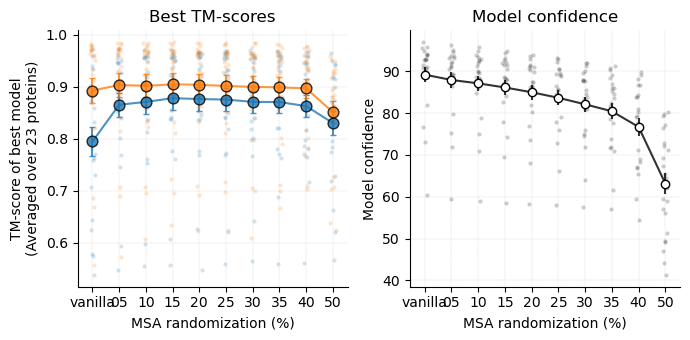

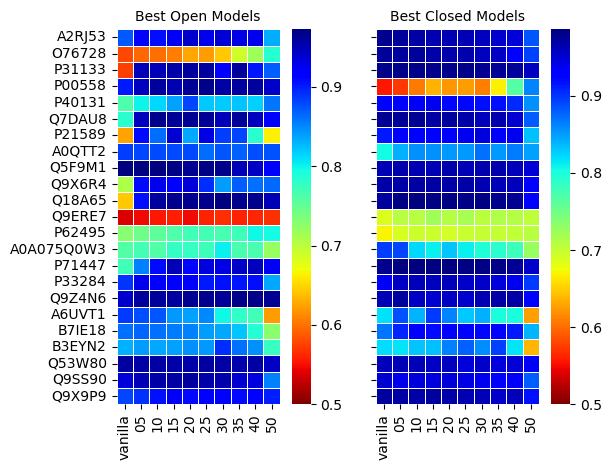

['vanilla', '05', '10', '15', '20', '25', '30', '35', '40', '50']


100%|██████████| 10/10 [03:07<00:00, 18.72s/it]


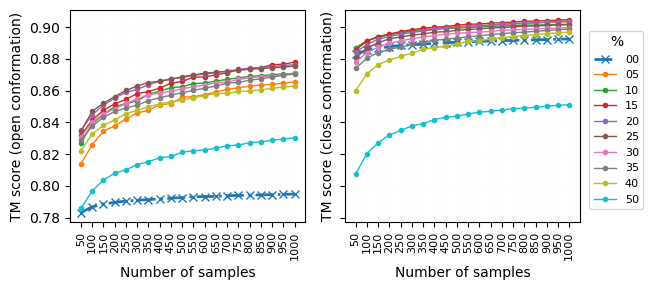

In [1]:
# --------------------------------
# Figure 2 (a,b,c)
# --------------------------------
# Expected DataFrame structure:
# Columns:
# - 'model_path' (str): File path to the model results
# - 'confidence' (float): Confidence score of the model
# - 'model_name' (str): Model name identifier (e.g., "model_1_ptm")
# - 'model_pdb' (str): Filename of the predicted PDB structure
# - 'state' (str): Model state (e.g., "TM_open")
# - 'tmscore' (float): TM-score for model quality assessment
# - 'uniprotid' (str): Unique protein identifier
# - 'rand' (str): Randomization category (e.g., "vanilla")

# Example:

#     model_path                                  | confidence | model_name  | model_pdb                                     | state   | tmscore | uniprotid | rand  
#     --------------------------------------------------------------------------------------------------------------------------
#     data/result_model_1_ptm_pred_80_vanilla.pkl | 89.91       | model_1_ptm  | unrelaxed_model_1_ptm_pred_80_dropout.pdb | TM_open | 0.53115 | A2RJ53   | vanilla
#     data/result_model_1_pred_9_vanilla.pkl      | 90.85       | model_1      | unrelaxed_model_1_pred_9_dropout.pdb      | TM_open | 0.57069 | A2RJ53   | 15
#     data/result_model_2_ptm_pred_53_vanilla.pkl | 89.64       | model_2_ptm  | unrelaxed_model_2_ptm_pred_53_dropout.pdb | TM_open | 0.56201 | A2RJ53   | 30

from plotting_functions import ProteinDataAnalyzer
analyzer = ProteinDataAnalyzer("../analysis_results/general/master_df_good.csv")
analyzer.analyze()

### Figure 3: AFsample2 demonstrates a higher ability to generate good-quality open and closed conformations than baseline methods   
(a) Comparing TM-scores of best models generated for open and closed states by all methods. (b) Best generated models for the OC23 dataset by all methods under consideration in terms of similarity (TMscore) to the reference states show significant (\textit{Wilcoxon signed-rank test p-value: *<0.05, **<0.01, ***<0.001, n=23)} improvement, especially for the open state, (c) Fraction of successful targets compared among methods at different levels of TM-score thresholds. Success: TM-score > threshold (for both states), (d) comparing the minimum of the best two selections (one for each state) for all methods against AFsample2 $|\Delta |$TM<0.05 in gray, green AFsample2 improved, red AFsample2 worsen (Wilcoxon signed-rank test p-value, n=23)); (e) Improvement of AFsample2 over AFvanilla for open and closed conformations, (f) Examples illustrating generated states by AFsample2 along with their similarity to reference pdbs.

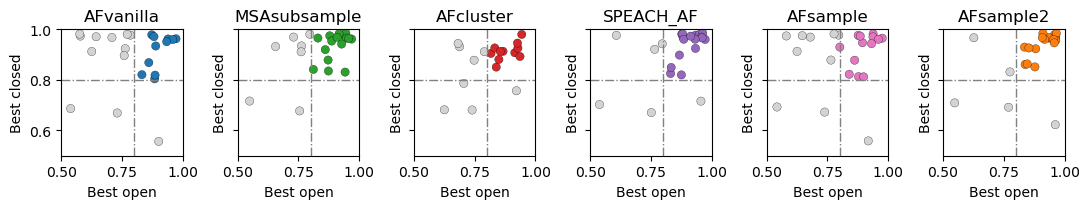

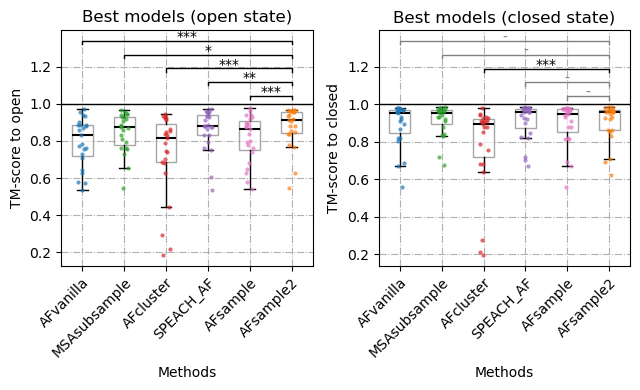

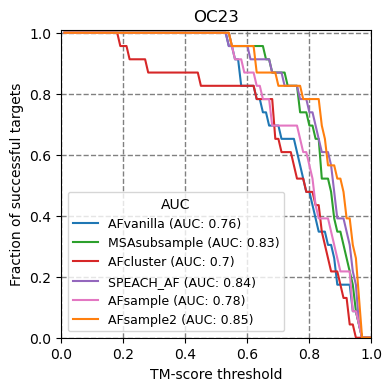

AFvanilla AFsample2 1.19e-06
MSAsubsample AFsample2 1.92e-02
AFcluster AFsample2 3.66e-05
SPEACH_AF AFsample2 1.38e-02
AFsample AFsample2 2.26e-06


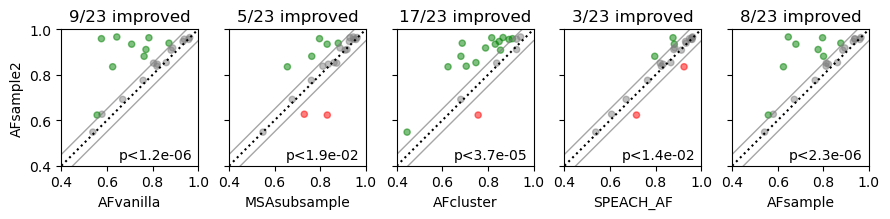

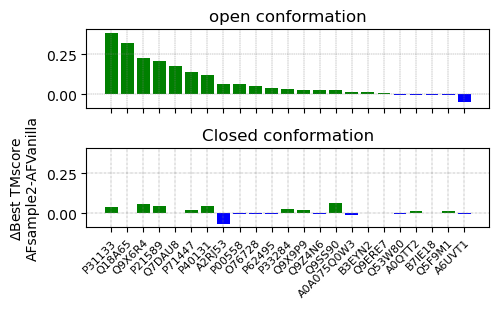

In [ ]:
# --------------------------------
# Figure 3
# --------------------------------
# Expected DataFrame structure:
# Columns:
# - 'uniprotid' (str): Unique protein identifier
# - 'AFvanilla' (float): Score from AF vanilla model
# - 'MSAsubsample' (float): Score from MSA subsample
# - 'AFcluster' (float): Score from AF clustering
# - 'SPEACH_AF' (float): Score from SPEACH_AF method
# - 'AFsample' (float): Score from AF sample method
# - 'AFsample2' (float): Score from AF sample2 method

# Example:
#   uniprotid  | AFvanilla | MSAsubsample | AFcluster | SPEACH_AF | AFsample | AFsample2
#   -----------------------------------------------------------------------------
#   A2RJ53     |  0.87205  |    0.87878   |  0.68717  |  0.93350  |  0.87654 |  0.93906
#   O76728     |  0.57797  |    0.72989   |  0.18369  |  0.60689  |  0.58054 |  0.62655

from plotting_functions import BestModelsPlotter
dataset = 'OC23'
best_tms_o_path = '../analysis_results/general/best_tmso_oc23.csv'
best_tms_c_path = '../analysis_results/general/best_tmsc_oc23.csv'

plotter_oc23 = BestModelsPlotter(best_tms_o_path, best_tms_c_path, dataset)
plotter_oc23.main()

### Figure 4: Analysing diversity of generated ensembles.
(a) Diversity plot showing similarity of generated models with open and closed reference structures for AFsample2 ensemble on selected target from OC23 dataset along with an indicative representaion of fill-ratio.
(b) Comparing \textit{fill ratios} of the model ensembles generated by all methods under consideration for all targets in the OC23 dataset.
(c) Heatmap summarizing \textit{fill-ratios} for all targets in the OC23 dataset when compared between methods.}

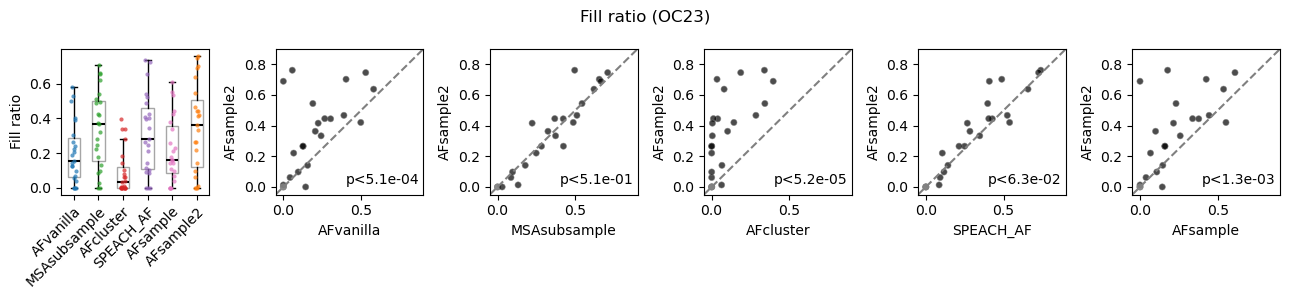

In [3]:
# Figure 4b
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon
fillratio2_df = pd.read_csv('../analysis_results/general/fillratio_df_oc23.csv', index_col=0)


fig, axes = plt.subplots(1,6, figsize=(13,3))
tolerance = 0
for method, ax in zip(fillratio2_df.columns[:-1], axes.flatten()[1:]):
    colors = [
        'gray' if abs(x - y) <= tolerance else ('black' if x > y else 'black') 
        for x, y in zip(fillratio2_df[method], fillratio2_df['AFsample2'])
    ]
    
    ax.scatter(fillratio2_df[method], fillratio2_df['AFsample2'], c=colors, s=20, edgecolor='gray', alpha=0.7, linewidth=0.5)

    ax.axline((0, 0), slope=1, linestyle='--', color='gray')
    ax.set_xlim(-0.05, 0.9)
    ax.set_ylim(-0.05, 0.9)
    
    ax.set_ylabel('AFsample2')
    ax.set_xlabel(f'{method}')

    # Add tolerance lines
    x_vals = np.linspace(-0.05, 0.9, 100)
    pval = wilcoxon( fillratio2_df['AFsample2'], fillratio2_df[method], alternative='greater').pvalue
    ax.text(0.4,0.02,f"p<{pval:.1e}")

p = sns.color_palette()
colors = [p[0], p[2], p[3], p[4], p[6], p[1]]

cols = fillratio2_df.columns
positions = range(len(cols))  # 0-based for consistency
box_c = axes.flatten()[0].boxplot([fillratio2_df[col] for col in cols], patch_artist=True, showfliers=False,
                      positions=positions,  # Use the same 0-based positions
                      meanprops={'marker': '_', 'markerfacecolor': 'black', 'markeredgecolor': 'black'}, boxprops=dict(alpha=.7))
for patch, color in zip(box_c['boxes'], colors):
    patch.set_facecolor('white')
    patch.set_edgecolor('gray')
for median in box_c['medians']:
    median.set(color='black', linewidth=1.5)
for i, col in enumerate(cols):
    sns.stripplot(x=np.full(len(fillratio2_df), i), y=fillratio2_df[col], color=colors[i], 
                  alpha=0.7, size=3, jitter=True, ax=axes.flatten()[0])

rands = fillratio2_df.columns
axes.flatten()[0].set_xticklabels(rands,rotation=45, rotation_mode='anchor', ha='right')
axes.flatten()[0].set_ylabel('Fill ratio')

plt.suptitle('Fill ratio (OC23)')
plt.tight_layout()
plt.show()

In [6]:
fillratio2_df.index

Index(['A2RJ53', 'O76728', 'P31133', 'P00558', 'P40131', 'Q7DAU8', 'P21589',
       'A0QTT2', 'Q5F9M1', 'Q9X6R4', 'Q18A65', 'Q9ERE7', 'P62495',
       'A0A075Q0W3', 'P71447', 'P33284', 'Q9Z4N6', 'A6UVT1', 'B7IE18',
       'B3EYN2', 'Q53W80', 'Q9SS90', 'Q9X9P9'],
      dtype='object')

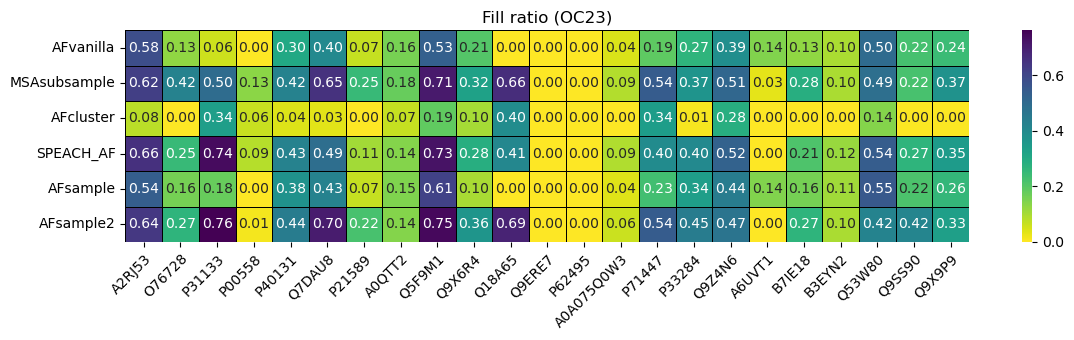

In [7]:
# Figure 4c
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,3.5))
sns.heatmap(fillratio2_df.T, annot=True,  ax=ax, cmap='viridis_r', linecolor='black', linewidth=0.5, fmt=".2f")
ax.set_title('Fill ratio (OC23)')
#ax.set_yticklabels(good_examples.keys(),rotation=45, rotation_mode='anchor', ha='right')
ax.set_xlabel('')
ax.set_xticklabels(fillratio2_df.index, rotation=45, rotation_mode='anchor', ha='right')
plt.tight_layout()
plt.show()

### Figure 5: AFsample2 ensembles mapped to PDB.
Experimental structures in the PDB with similar sequences (>90\%) shown with there corresponding TMscore. The closest model mapped to the PDB (sequence similarity >90\%) is annotated with colors.(a)-(d) show cases where it was possible to find structural intermediates, (e)-(h) show cases where no intermediates were found in PDB.

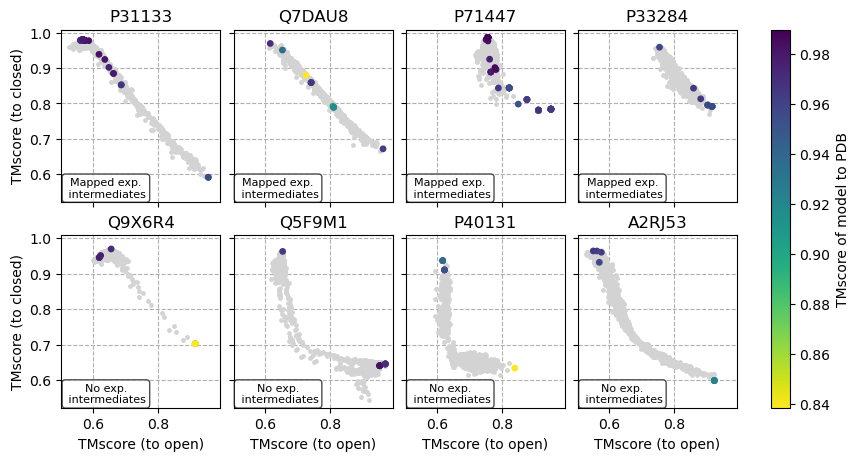

In [52]:
# Figure 5: AFsample2 ensembles mapped to PDB.
datapath = '../analysis_results/general/'

pdbhits_df = pd.read_csv(f'{datapath}/intermediates_summary.csv')
pdbhits_df_f = pdbhits_df[pdbhits_df['tmscore_to_model']>0.8]
pdbhits_df_f

afs2_tmdf = pd.read_csv(f'{datapath}/master_df_good.csv')
grp_afs2_tmdf = afs2_tmdf.groupby("uniprotid")

fig, axes = plt.subplots(2, 4, figsize=(8.5, 4.5), sharex=True, sharey=True, constrained_layout=True)
vmin = pdbhits_df_f.tmscore_to_model.min()
vmax = pdbhits_df_f.tmscore_to_model.max()

for uniprotid, ax in zip(pdbhits_df.protein.unique(), axes.flatten()):
    tm_df = grp_afs2_tmdf.get_group(uniprotid)
    tm_df = tm_df[tm_df['rand'] == '15']
    ax.scatter(tm_df[tm_df['state'] == 'TM_open'].tmscore, 
               tm_df[tm_df['state'] == 'TM_close'].tmscore, 
               color='lightgray', s=6, zorder=2)
    pdbhits_df_ = pdbhits_df[pdbhits_df['protein'] == uniprotid]
    c = ax.scatter(pdbhits_df_.max_row_tmo, 
                   pdbhits_df_.max_row_tmc, 
                   c=pdbhits_df_.tmscore_to_model, 
                   vmin=vmin, vmax=vmax, cmap='viridis_r', s=15, zorder=3)
    ax.set_title(uniprotid)

for ax in axes[1]:
    ax.set_xlabel('TMscore (to open)')
    ax.text(
            0.28, 
            0.08, 
            'No exp.\n intermediates', 
            color="black", 
            fontsize=8, 
            rotation=0, 
            ha="center", 
            va="center",
            transform=ax.transAxes,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
            )

for ax in axes[0]:
    ax.text(
            0.28, 
            0.08, 
            'Mapped exp.\n intermediates', 
            color="black", 
            fontsize=8, 
            rotation=0, 
            ha="center", 
            va="center",
            transform=ax.transAxes,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
            )
    
for ax in axes[:, 0]:
    ax.set_ylabel('TMscore (to closed)')
for ax in axes.flatten():
    ax.grid(linestyle='--', zorder=1)  # Lower zorder for the gridlines

cbar = fig.colorbar(c, ax=axes, orientation='vertical', shrink=1, aspect=20)
cbar.set_label('TMscore of model to PDB')
plt.show()


### Figure 6: Comparing ensemble fluctuations with reference states. (a) Analysing the amount of residue fluctuations observed by all methods in consideration. 
(a) A consolidated analysis of per-residue fluctuations observed in the model ensemble for B3EYN2 and its correlation with C-α distances between experimental states, for
AFvanilla and AFsample2 (b) Comparing correlation statistics for all proteins in the OC23 dataset between methods. (c) Relationship between fill-ratio (quantifies ensemble
diversity) and correlation in ensemble fluctuation with per-residue reference distances.

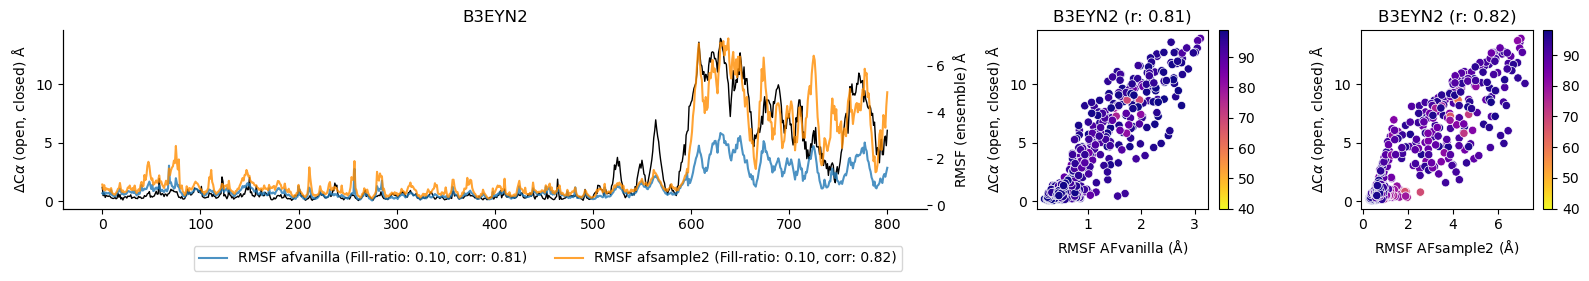

In [66]:
# Figure 6a and S4
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec
import seaborn as sns
import matplotlib.gridspec as gridspec
import pickle

def load_pkl(pklpath):
	with open(pklpath, 'rb') as f:
		return pickle.load(f)

data1 = load_pkl('/proj/wallner-b/users/x_yogka/AFsample2/revision/results/automated_f_corr_afvanilla_d35_patched.pkl')	# randomref is with d0=3.5
data3 = load_pkl('/proj/wallner-b/users/x_yogka/AFsample2/revision/results/automated_f_corr_afsample2_d35_patched.pkl')

fill_ratio = pd.read_csv('../analysis_results/general/fillratio_df_oc23.csv')
fill_ratio.index = fill_ratio['Unnamed: 0']
for protein in fill_ratio.index.values:
    protein = 'B3EYN2'
    # Create the GridSpec object
    fig = plt.figure(figsize=(16, 3))
    gs = gridspec.GridSpec(1, 10, figure=fig)

    # Define subplots with different sizes
    ax1 = fig.add_subplot(gs[0, :6])  # First row, first two column
    ax2 = fig.add_subplot(gs[0, 6:8])   # First row, third column
    ax3 = fig.add_subplot(gs[0, 8:10])   # First row, third column

    common_residue_indices = data1[protein]['common_residue_indices']
    a1 = ax1.plot(data1[protein]['rmsf_baseline'][common_residue_indices], 
                label=r'$ \Delta $'+'C'+r'$ \alpha $'+' (References)', 
                linestyle='-', linewidth=1, color='black')
    #plt.grid(linestyle='--', zorder=-1)
    ax1_ = ax1.twinx()
    fill, corr = fill_ratio['AFvanilla'][protein], np.round(data1[protein]['r_spear'], 2)
    a2 = ax1_.plot(data1[protein]['model_rmsf'][common_residue_indices], 
                    label=f"RMSF afvanilla (Fill-ratio: {fill:.2f}, corr: {corr:.2f})",
                    alpha=0.8)

    fill, corr = fill_ratio['AFsample2'][protein], np.round(data3[protein]['r_spear'], 2)
    a2 = ax1_.plot(data3[protein]['model_rmsf'][common_residue_indices], 
                    label=f"RMSF afsample2 (Fill-ratio: {fill:.2f}, corr: {corr:.2f})",
                    alpha=0.8, c='darkorange')
    ax1.set_title(protein)
    #ax1.legend(ncol=4, bbox_to_anchor=(0.32, -0.19))
    ax1_.legend(bbox_to_anchor=(0.98, -0.17),  ncol=5)

    ax1_.set_ylabel("RMSF (ensemble) " + "$\mathrm{\AA}$")
    ax.set_ylabel(r'$ \Delta $'+'C'+r'$ \alpha $'+ ' (open, closed) '+ "$\mathrm{\AA}$")
    ax1_.set_xlabel('Residues')

    cx = ax2.scatter(data1[protein]['model_rmsf'][common_residue_indices],
                    data1[protein]['rmsf_baseline'][common_residue_indices],
                    c = data1[protein]['per_residue_bfactor_mean'][common_residue_indices], cmap='plasma_r', edgecolor='white', linewidth=0.5, label='AFvanilla', vmin=40)
    plt.colorbar(cx)
    ax2.set_xlabel('RMSF AFvanilla'+" ($\mathrm{\AA}$)")
    ax2.set_ylabel(r'$ \Delta $'+'C'+r'$ \alpha $'+ ' (open, closed) '+ "$\mathrm{\AA}$")
    ax2.set_title(protein+f" (r: {np.round(data1[protein]['r_spear'], 2)})")

    cx = ax3.scatter(data3[protein]['model_rmsf'][common_residue_indices],
                    data3[protein]['rmsf_baseline'][common_residue_indices],
                    c = data3[protein]['per_residue_bfactor_mean'][common_residue_indices], cmap='plasma_r', edgecolor='white', linewidth=0.5, label='AFsample2', vmin=40)
    plt.colorbar(cx)
    ax1.set_ylabel(r'$ \Delta $'+'C'+r'$ \alpha $'+ ' (open, closed) '+ "$\mathrm{\AA}$")
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1_.spines["top"].set_visible(False)
    ax1_.spines["right"].set_visible(False)
    plt.tight_layout()
    ax3.set_xlabel('RMSF AFsample2'+" ($\mathrm{\AA}$)")
    ax3.set_ylabel(r'$ \Delta $'+'C'+r'$ \alpha $'+ ' (open, closed) '+ "$\mathrm{\AA}$")
    ax3.set_title(protein+f" (r: {np.round(data3[protein]['r_spear'], 2)})")
    plt.show()
    break

### Figure 7: Reference-free state determination. 
(a) Schematic illustrating the process of identifying open and closed states from a pool of generated models. (b, e) Mean
squared error (MSE) between the TM-scores of selected and best possible model for AFsample2 and AFcluster. (c, d) Scatter plot between TM-scores of selected models
and best possible models generated by AFsample2 for all targets in the OC23 dataset (f,g - for AFcluster). An example with target Q5F9M1 showing (h) diversity plot and (i)
reference-free plot. The reference-free plot has been annotated with optimal selections for the open and closed state (j, k - AFcluster). (l) Comparing selected open (left) and
closed (right) models with the reference-free strategy for AFsample and AFcluster.

Rolling window: AFsample2
Best conf_threshold: 0.0, 0, losses: 0.12236391304347827
Best conf_threshold: 84.81100245721197, 90, losses: 0.11879260869565217


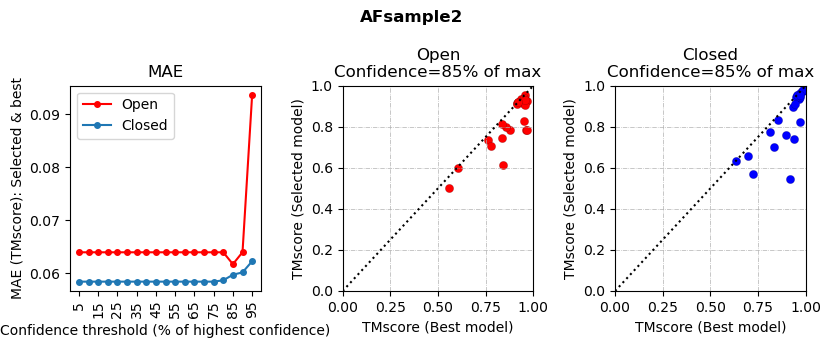

Rolling window: AFcluster
Best conf_threshold: 0.0, 0, losses: 0.5488778260869566
Best conf_threshold: 30.79699, 35, losses: 0.5433478260869565
Best conf_threshold: 35.19656, 40, losses: 0.5267717391304347
Best conf_threshold: 39.59613, 45, losses: 0.5027073913043477
Best conf_threshold: 43.9957, 50, losses: 0.46436260869565216
Best conf_threshold: 48.395270000000004, 55, losses: 0.42449869565217385
Best conf_threshold: 52.79484, 60, losses: 0.3976417391304349
Best conf_threshold: 57.19441, 65, losses: 0.34978347826086953
Best conf_threshold: 61.59398, 70, losses: 0.32929956521739134
Best conf_threshold: 65.99355, 75, losses: 0.2771065217391304
Best conf_threshold: 70.39312, 80, losses: 0.22168434782608698
Best conf_threshold: 74.79269, 85, losses: 0.16317434782608697
Best conf_threshold: 79.19226, 90, losses: 0.11970173913043478
Best conf_threshold: 83.59183, 95, losses: 0.10126652173913045


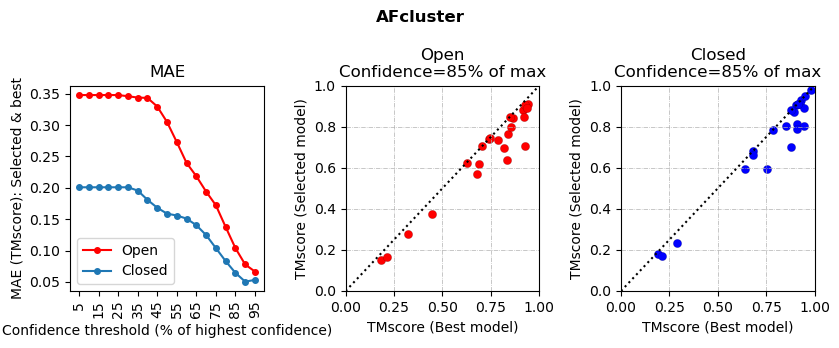

In [95]:
# Figure 7b-g
import os
import re
import sys
import glob
import pickle
import math
import collections
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error as mae

# Suppress pandas warnings
pd.options.mode.chained_assignment = None

def read_clusterfile(clusterfile):
    """Reads a cluster file and extracts model and cluster information."""
    data = []
    with open(clusterfile) as f:
        for line in f:
            match = re.match(r'protocols.cluster: \(0\)\s+\d+\s+(\S+)\s+(\d+)\s+\d+', line)
            if match:
                data.append({"model": match.group(1), "cluster": int(match.group(2))})
    return pd.DataFrame(data)

# Load filtered dictionary
with open('/proj/wallner-b/users/x_yogka/AFsample2/master_data/filtered_dict.pickle', 'rb') as handle:
    filtered_dict = pickle.load(handle)

good_examples = {k: v for k, v in filtered_dict.items() if v and v[3] < 0.85}
bad_examples = {k: v for k, v in filtered_dict.items() if v and v[3] > 0.85}

def classify_samples(state1, state2):
    """Classifies two samples into their respective states based on TM scores."""
    tm_s1_o, tm_s1_c, _ = state1
    tm_s2_o, tm_s2_c, _ = state2
    return (1, 2) if tm_s1_o + tm_s2_c < tm_s1_c + tm_s2_o else (2, 1)


# Iterate over confidence thresholds
def reference_free_selection(rand_dfs):
    # Initialize variables
    maes_o, maes_c = [], []
    best_result, lowest_error, num_models_mean = None, float('inf'), []
    for conf_threshold in np.arange(0, 101, 5):
        results = pd.DataFrame(columns=['uniprotid', 'r_thres', 'clusters_to_select', 'sel_tm_o', 'sel_tm_c', 'best_tm_o', 'best_tm_c'])
        num_models = []
        
        for i, uniprotid in enumerate(good_examples.keys()):      
            rand_df = rand_dfs[rand_dfs['uniprotid']==uniprotid]      
            max_confidence = rand_df['confidence'].max()
            conf_filtered = rand_df[rand_df['confidence'] >= max_confidence * (conf_threshold * 0.01)]
            num_models.append(len(conf_filtered))
            
            if conf_filtered.empty:
                results.loc[i] = [uniprotid, None, None, 0, 0, rand_df['TM_open'].max(), rand_df['TM_close'].max()]
                continue
            
            idx1, idx2 = conf_filtered['tm_bestAF'].idxmax(), conf_filtered['tm_bestAF'].idxmin()
            state1, state2 = conf_filtered.loc[idx1], conf_filtered.loc[idx2]
            b1, b2 = state1[['TM_open', 'TM_close', 'tm_bestAF']].values.flatten(), state2[['TM_open', 'TM_close', 'tm_bestAF']].values.flatten()
            state_check = classify_samples(b1, b2)
            
            sel_tm_o, sel_tm_c = (b2[0], b1[1]) if state_check == (1, 2) else (b1[0], b2[1])
            best_tm_o, best_tm_c = rand_df['TM_open'].max(), rand_df['TM_close'].max()
            results.loc[i] = [uniprotid, None, None, sel_tm_o, sel_tm_c, best_tm_o, best_tm_c]
        
        mae_o, mae_c = mae(results['best_tm_o'], results['sel_tm_o']), mae(results['best_tm_c'], results['sel_tm_c'])
        maes_o.append(mae_o)
        maes_c.append(mae_c)
        num_models_mean.append(np.mean(num_models))
        
        if mae_o + mae_c < lowest_error:
            best_result = results
            lowest_error = mae_o + mae_c
            print(f'Best conf_threshold: {max_confidence * (conf_threshold * 0.01)}, {conf_threshold}, losses: {lowest_error}')

    # Compute rolling averages
    maes_o_rolling = [(maes_o[i - 1] + maes_o[i + 1] + maes_o[i]) / 3 for i in range(1, len(maes_o) - 1)]
    maes_c_rolling = [(maes_c[i - 1] + maes_c[i + 1] + maes_c[i]) / 3 for i in range(1, len(maes_c) - 1)]

    return best_result, maes_o_rolling, maes_c_rolling

# AFsample2
print('Rolling window: AFsample2')
rand_df = pd.read_csv(f'/proj/wallner-b/users/x_yogka/github_repositories/AFsample2/analysis_results/general/rand_dfs_afsample2_oc23.csv')
best_result, maes_o_rolling, maes_c_rolling = reference_free_selection(rand_df)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(8.5,3.5))
ax[0].plot(range(len(maes_o_rolling)), maes_o_rolling, label='Open', c='red', marker='o', markersize=4)
ax[0].plot(range(len(maes_c_rolling)), maes_c_rolling, label='Closed', marker='o', markersize=4)
ax[0].set_xticks(np.arange(0, 20, step=2))
ax[0].set_xticklabels([5, 15, 25, 35, 45, 55, 65, 75, 85, 95], rotation=90)
ax[0].set_title('MAE', fontsize=12)
ax[0].set_xlabel('Confidence threshold (% of highest confidence)')
ax[0].set_ylabel('MAE (TMscore): Selected & best')
ax[0].legend()

for j, label, color, best_tm, sel_tm in zip([1, 2], ['Open', 'Closed'], ['red', 'blue'], ['best_tm_o', 'best_tm_c'], ['sel_tm_o', 'sel_tm_c']):
    ax[j].scatter(best_result[best_tm], best_result[sel_tm], edgecolor='black', linewidth=0.1, c=color)
    ax[j].set_title(f'{label}\nConfidence=85% of max', fontsize=12)
    ax[j].set_xlabel('TMscore (Best model)')
    ax[j].set_ylabel('TMscore (Selected model)')
    ax[j].axline((0, 0), slope=1, color='black', linestyle=':')
    ax[j].grid(linestyle='-.', linewidth=0.5)
    ax[j].set_ylim(0, 1)
    ax[j].set_xlim(0, 1)

plt.suptitle('AFsample2', fontweight='bold')
plt.tight_layout()
plt.show()

# AFcluster
print('Rolling window: AFcluster')
rand_df = pd.read_csv(f'/proj/wallner-b/users/x_yogka/github_repositories/AFsample2/analysis_results/general/rand_dfs_afcluster_oc23.csv')
best_result, maes_o_rolling, maes_c_rolling = reference_free_selection(rand_df)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(8.5,3.5))
ax[0].plot(range(len(maes_o_rolling)), maes_o_rolling, label='Open', c='red', marker='o', markersize=4)
ax[0].plot(range(len(maes_c_rolling)), maes_c_rolling, label='Closed', marker='o', markersize=4)
ax[0].set_xticks(np.arange(0, 20, step=2))
ax[0].set_xticklabels([5, 15, 25, 35, 45, 55, 65, 75, 85, 95], rotation=90)
ax[0].set_title('MAE', fontsize=12)
ax[0].set_xlabel('Confidence threshold (% of highest confidence)')
ax[0].set_ylabel('MAE (TMscore): Selected & best')
ax[0].legend()

for j, label, color, best_tm, sel_tm in zip([1, 2], ['Open', 'Closed'], ['red', 'blue'], ['best_tm_o', 'best_tm_c'], ['sel_tm_o', 'sel_tm_c']):
    ax[j].scatter(best_result[best_tm], best_result[sel_tm], edgecolor='black', linewidth=0.1, c=color)
    ax[j].set_title(f'{label}\nConfidence=85% of max', fontsize=12)
    ax[j].set_xlabel('TMscore (Best model)')
    ax[j].set_ylabel('TMscore (Selected model)')
    ax[j].axline((0, 0), slope=1, color='black', linestyle=':')
    ax[j].grid(linestyle='-.', linewidth=0.5)
    ax[j].set_ylim(0, 1)
    ax[j].set_xlim(0, 1)

plt.suptitle('AFcluster', fontweight='bold')
plt.tight_layout()
plt.show()

### Figure 8: AFsample2 tested on a transporter dataset with 16 targets. 
(a) Comparing TM-scores of best models generated for inward-facing and outward-facing states for
all targets and methods on the TP16 set, (b) Distribution of best generated models for the TP16 dataset by all methods under consideration in terms of similarity (TMscore)
to the reference states show significant (Wilcoxon signed-rank test p-value: *<0.05, **<0.01, ***<0.001, - ns)), (c) Fraction of successful targets compared among methods at
different levels of TM-score thresholds. Success: TM-score > threshold (for both states), (d) Comparing the minium of the best selection for all methods against AFsample2
∆TM<0.05 in gray, green AFsample2 improved, red AFsample2 worsen;

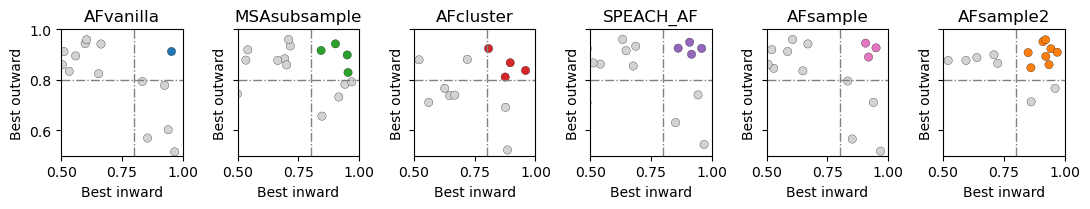

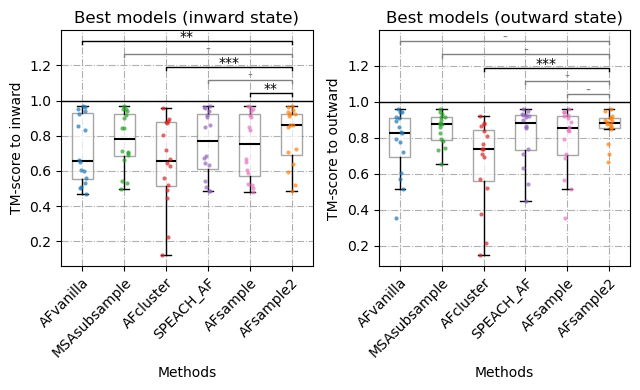

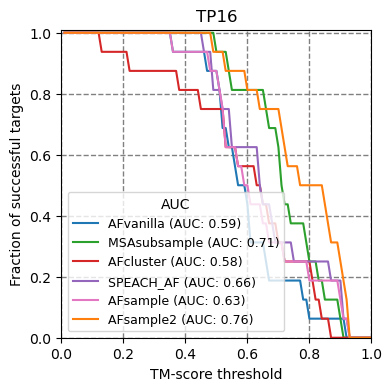

AFvanilla AFsample2 4.58e-05
MSAsubsample AFsample2 2.22e-02
AFcluster AFsample2 2.90e-04
SPEACH_AF AFsample2 1.68e-02
AFsample AFsample2 2.90e-04


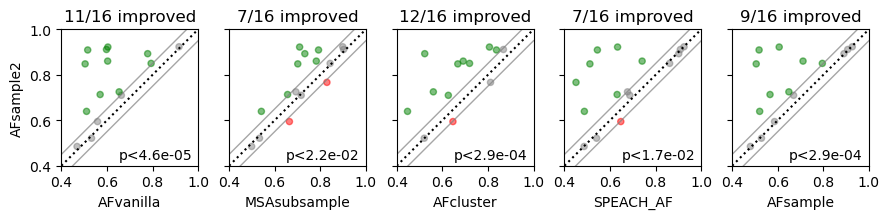

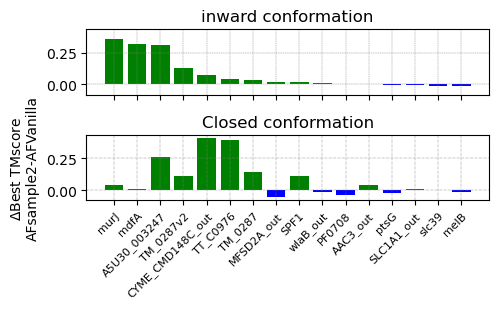

In [ ]:
from plotting_functions import BestModelsPlotter
best_tms_o_path = '../analysis_results/general/best_tm_ou_tp16.csv'
best_tms_c_path = '../analysis_results/general/best_tm_in_tp16.csv'
dataset = 'TP16'
plotter_tp16 = BestModelsPlotter(best_tms_o_path, best_tms_c_path, dataset)
plotter_tp16.main()